## Worksheet 4
### companion to lecture 4

Independent events/variables and conditionality


Suppose we throw 3 six-sided fair dice independently.

1. Use R to calculate the probability of getting 2 sixes and a four.

In [1]:
(1/6)^3  # 1/6 probab for getting 6 and we are throwing the dice 3 times.

[1] 0.00462963

In [2]:
# 664,466,646 -- 3 possibilities
((1/6)^3)*3

[1] 0.01388889

In [3]:
dbinom(2,2,prob = 1/6) * dbinom(1,1,prob = 1/6)*3

[1] 0.01388889

In [4]:
dbinom(3,3,prob = 1/6)*3

[1] 0.01388889

2. Calculate the probability that the third dice will be a four given the first two dice was a one.

In [5]:
dbinom(1,1,1/6)
# or just 1/6

[1] 0.1666667

3. Calculate the probability that the sum of the three dice is at least 13, given that the first two dice rolls were 4 and 5.

In [14]:
1/6 + 1/6 + 1/6

[1] 0.5

In [15]:
1/6 * 3

[1] 0.5

4. Write R code to calculate 1000 simulations of the dice being thrown 3 times.

In [6]:
replicate(1000,{
    sample(1:6, size = 3, replace = TRUE)
})

5,4,4,2,4,3,2,4,5,1,...,4,1,2,2,3,5,4,1,6,3
6,4,5,6,5,6,3,4,3,5,...,4,5,6,5,5,5,1,2,1,4
4,1,5,1,1,5,4,1,1,1,...,6,4,1,4,2,3,1,5,1,6


Here's the Iraqi refugee categorical data. 

In [7]:
library(knitr)
iraqi = c(123, 70, 93, 157)
levs = c("low", "moderate", "high", "very high")
names(iraqi) = levs
kable(t(as.matrix(iraqi)), caption="Numbers of refugees in each distress category")



| low| moderate| high| very high|
|---:|--------:|----:|---------:|
| 123|       70|   93|       157|

5. Use the `barplot` command to plot the data, creating both a horizontal and an vertical one.

In [8]:
iraqi

low  moderate      high very high 
      123        70        93       157

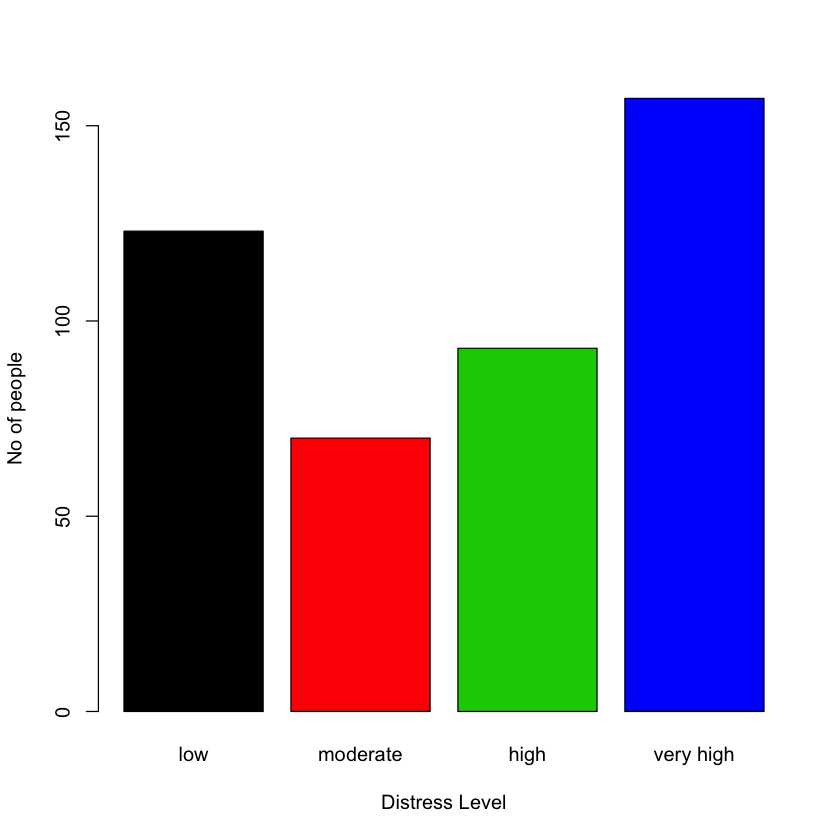

In [9]:
# Vertical barplot
barplot(iraqi,col = 1:4, xlab ="Distress Level", ylab = "No of people")

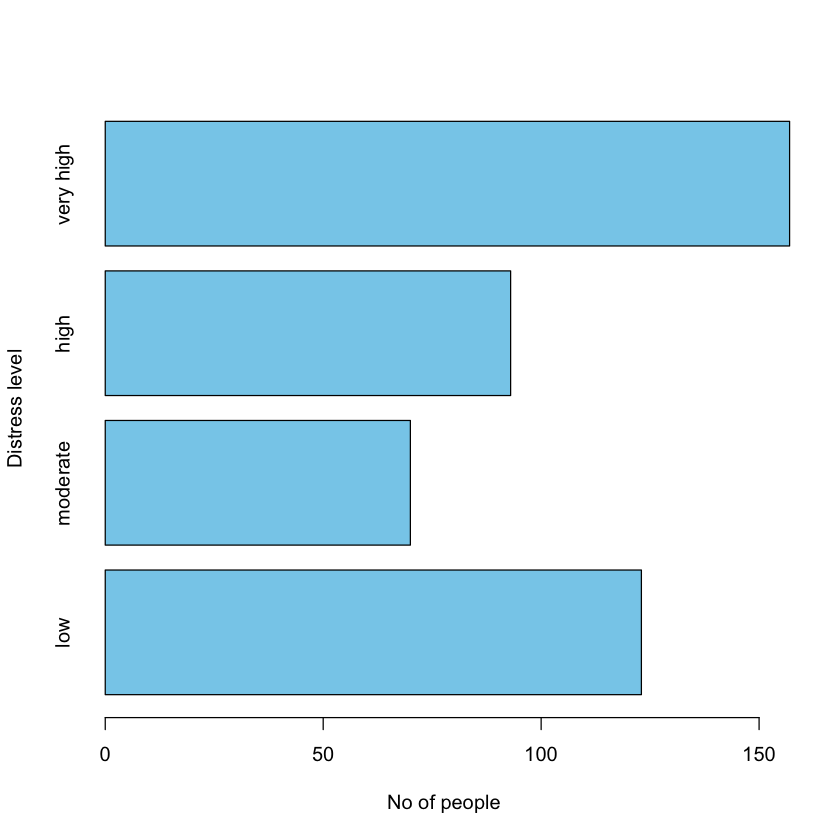

In [10]:
# horizontal barplot
barplot(iraqi, horiz = TRUE, ylab = "Distress level", xlab = "No of people", col="skyblue")

The following data is the AIHW percentages of each distress category (the Australian reference dataset).

In [11]:
aihw = c(0.706533566731324, 0.185013246912996, 0.074141316175427, 0.0343118701802526)
levs = c("low", "moderate", "high", "very high")
names(aihw) = levs
aihw = round(100*aihw, 2)
kable(t(as.matrix(aihw)), caption="Australians in each distress category (%)")



|   low| moderate| high| very high|
|-----:|--------:|----:|---------:|
| 70.65|     18.5| 7.41|      3.43|

6. Draw a barplot for this dataset. Then draw a barplot with both the Iraqi and AIHW datasets, scaled correctly.

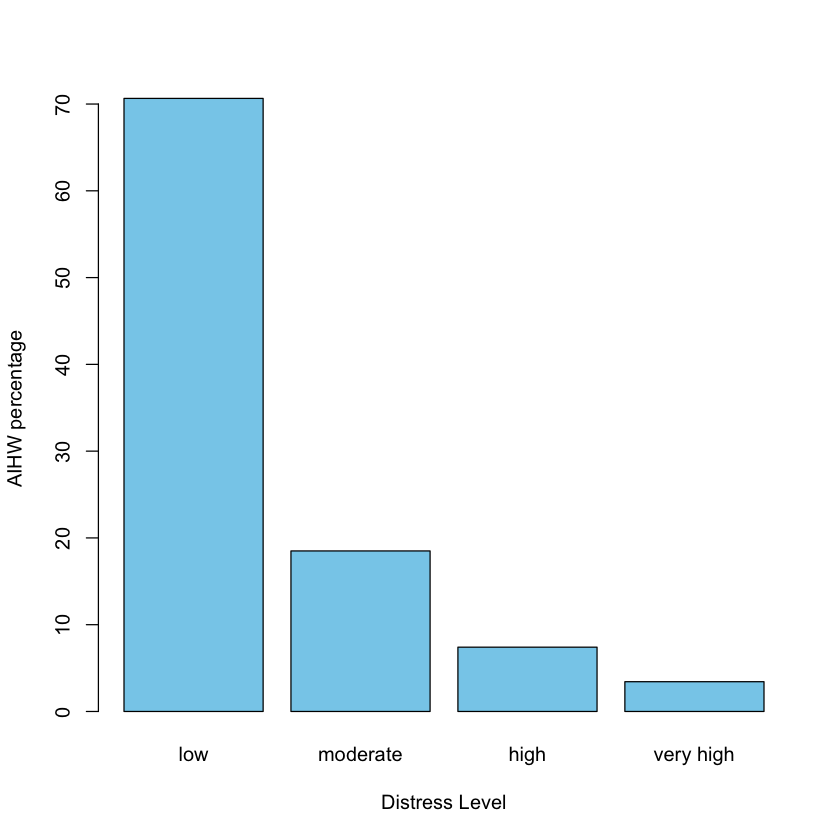

In [12]:
barplot(aihw, xlab="Distress Level", ylab="AIHW percentage", col="skyblue")

low  moderate      high very high 
      123        70        93       157

low  moderate      high very high 
    70.65     18.50      7.41      3.43

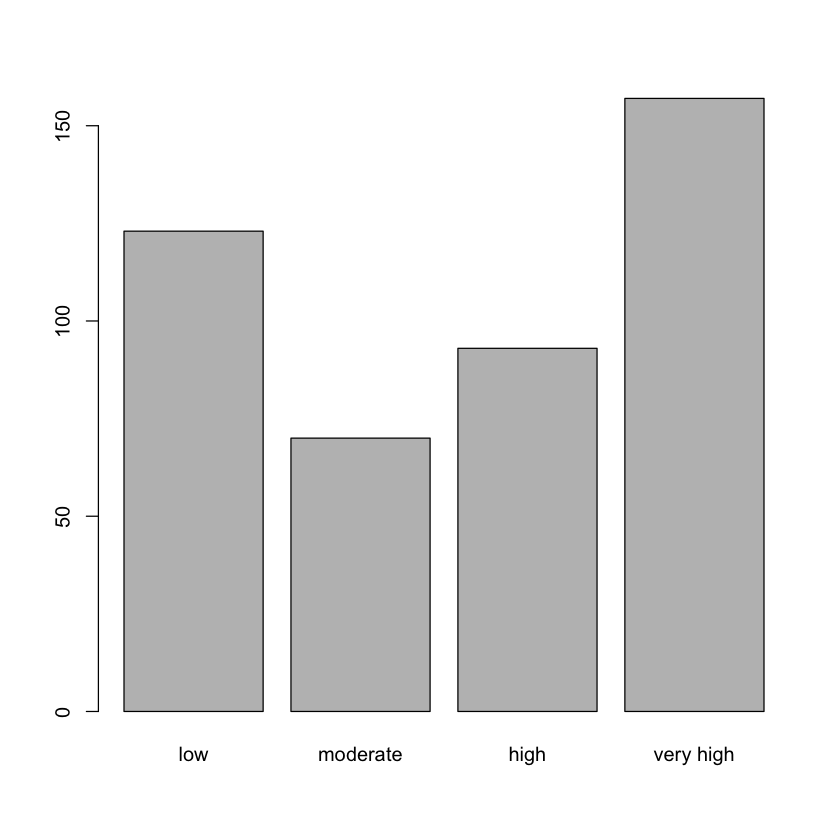

In [13]:
iraqi
aihw
barplot(iraqi)

In [14]:
refugees <- iraqi /sum(iraqi)*100  # Taking % of iraquis
refugees

low  moderate      high very high 
 27.76524  15.80135  20.99323  35.44018

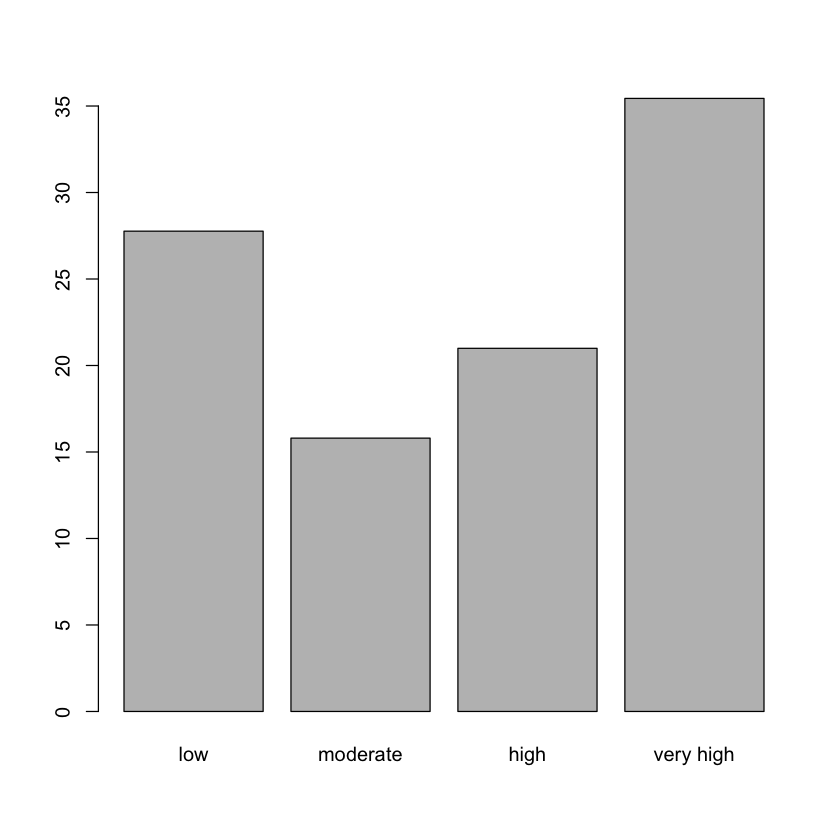

In [15]:
barplot(refugees)

In [44]:
comp <- rbind(refugees, aihw)
cbind(aihw, refugees) # binding by column wise

,aihw,refugees
low,70.65,27.76524
moderate,18.50,15.80135
high,7.41,20.99323
very high,3.43,35.44018


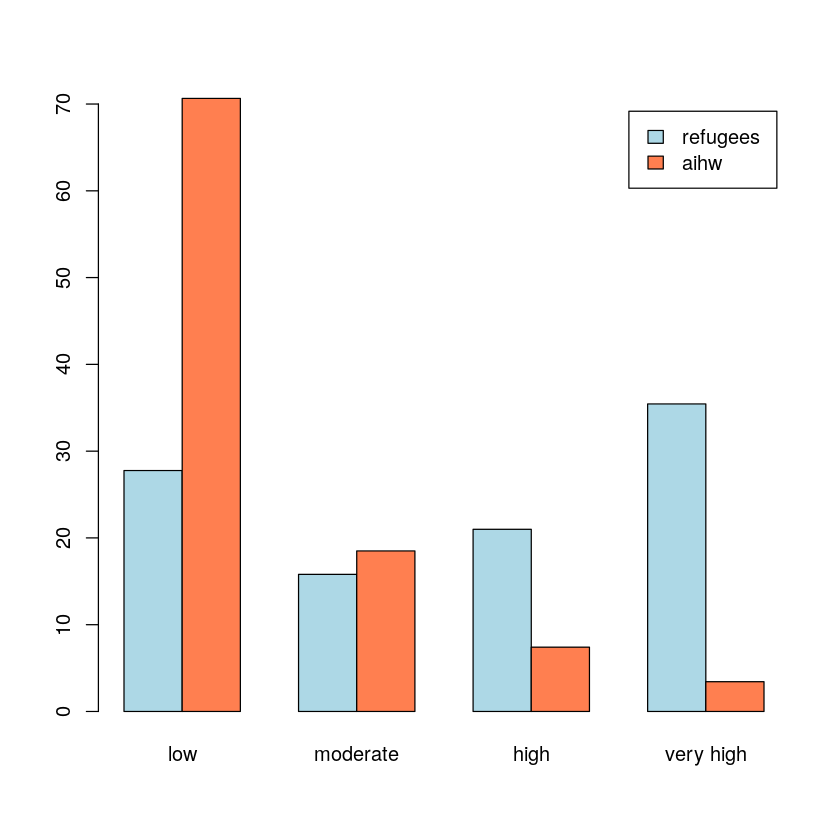

In [46]:
barplot(comp, beside = TRUE, col=c("lightblue", "coral"), legend= TRUE)

There are a total of 443 Iraqi refugees divided into 4 categories. In the lecture we calculated the expected counts they would have if they matched the AIHW proportions.

7. Calculate these 4 values, and store them in a vector e.

In [48]:
e<- aihw *443/100
e

low  moderate      high very high 
 312.9795   81.9550   32.8263   15.1949

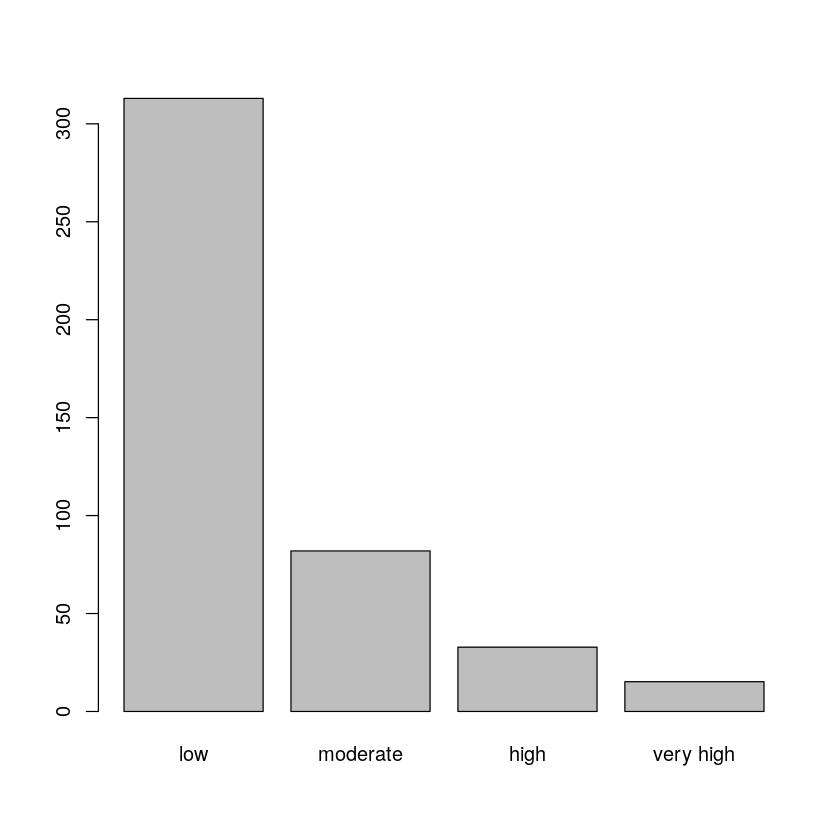

In [49]:
barplot(e)

8. Compute then the chi-squared distance of the Iraqi counts from these expected values.

In [52]:
sum((iraqi-e)^2/e)

[1] 1550.75